In [1]:
# pip install -U finance-datareader

In [1]:
import FinanceDataReader as fdr

In [2]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,반채운 윤규선 이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [3]:
len(df_krx)

2564

In [4]:
#삼성전자 2019년
price = fdr.DataReader('005930', '2019-01-01' , '2019-12-31')
price.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
2019-01-09,38650,39600,38300,39600,17452708,0.039370
2019-01-10,40000,40150,39600,39800,14731699,0.005051
2019-01-11,40350,40550,39950,40500,11661063,0.017588
2019-01-14,40450,40700,39850,40050,11984996,-0.011111


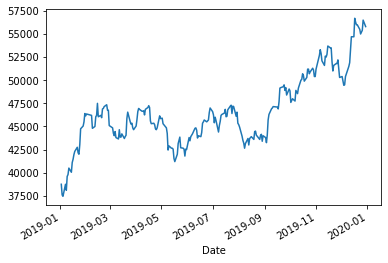

In [5]:
price['Close'].plot()

#### OBV 지표 그리기

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
open = price.Open
high = price.High
low = price.Low
close = price.Close
volume = price.Volume

- 당일 종가 > 전일종가 : 𝑂𝐵𝑉=𝑂𝐵𝑉−1 + 당일 거래량
- 당일 종가 < 전일종가 : 𝑂𝐵𝑉=𝑂𝐵𝑉−1 − 당일 거래량
- 당일 종가 = 전일종가 : 𝑂𝐵𝑉=𝑂𝐵𝑉−1

In [8]:
def OBV(close, volume):
    obv = pd.Series(index=close.index)
    obv.iloc[0] = volume.iloc[0]
    
    #OBV산출공식
    for i in range(1, len(close)) :
        if close.iloc[i] > close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + volume[i]
            
        elif close.iloc[i] < close.iloc[i-1] :
            obv.iloc[i] = obv.iloc[i-1] - volume[i]
            
        else:
            obv.iloc[i] = obv.iloc[i-1]
    
    return obv

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


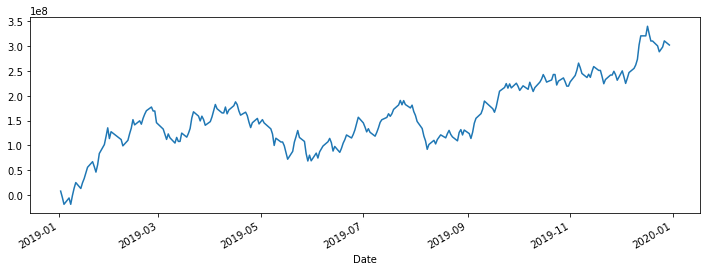

In [9]:
# obv
obv = OBV(close, volume)
obv.plot(figsize=(12,4))

In [10]:
price['OBV'] = obv

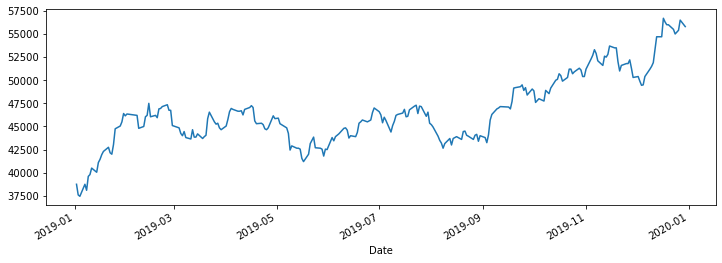

In [11]:
# 주가 그래프
price['Close'].plot(figsize=(12,4))

주가 그래프와 OBV 그래프의 동향이 비슷함

In [12]:
price_HL = price[['High', 'Low']]
price_HL.head()

,High,Low
Date,,
2019-01-02,39400,38550
2019-01-03,38550,37450
2019-01-04,37600,36850
2019-01-07,38900,37800
2019-01-08,39200,37950


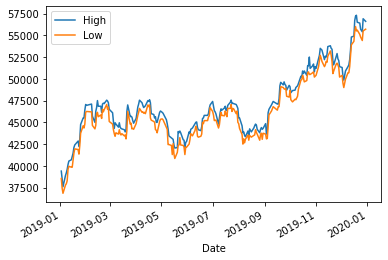

In [13]:
price_HL.plot()

In [14]:
price.head()

,Open,High,Low,Close,Volume,Change,OBV
Date,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,7847664.0
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,-4623829.0
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,-18732787.0
2019-01-07,38000,38900,37800,38750,12748997,0.034713,-5983790.0
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,-18740344.0


In [15]:
# price.to_csv("samsung2019.csv")

In [16]:
roll_mean5 = pd.Series.rolling(price['OBV'], window=5, center = False).mean()
roll_mean10 = pd.Series.rolling(price['OBV'], window=10, center = False).mean()
roll_mean20 = pd.Series.rolling(price['OBV'], window=20, center = False).mean()

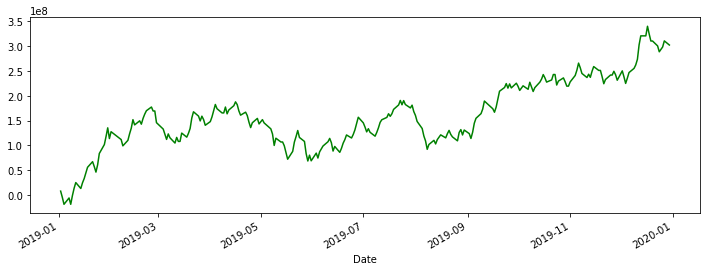

In [17]:
price['OBV'].plot(color='green', figsize=(12,4))

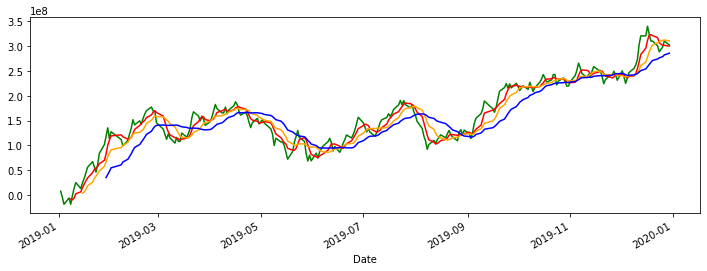

In [18]:
# obv이동평균 시각화 
price['OBV'].plot(color='green', figsize=(12,4))
roll_mean5.plot(color='red', label='5 day rolling mean')
roll_mean10.plot(color='orange', label='10 day rolling mean')
roll_mean20.plot(color='blue', label='30 day rolling mean')

단기 이평선과 장기 이평선의 추이가 역전되지 않는 모습이 지속됨

### 재무재표 가져오기

- 재무제표 URL
https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=종목코드&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701

- 재무비율 URL
https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=종목코드&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701



In [19]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime 
import time 
import urllib.request
from selenium.webdriver import Chrome
import json
import re     
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [20]:
chrome_driver = 'D:/bigdata/jupyter_python/chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)
driver.implicitly_wait(10)

In [21]:
def get_html(ticker, gb):

    #gb: 0 : 재무제표, 1 : 재무비율, 2: 투자지표, 3:컨센서스 

    url=[]

    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A" + ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A" + ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode=A"+ ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Consensus.asp?pGB=1&gicode=A" + ticker +"&cID=&MenuYn=Y&ReportGB=&NewMenuID=108&stkGb=701")

    if gb>3 :
        return None

    url = url[gb]
    try:

        response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text)

    except AttributeError as e :
        return None

    
    return soup

In [2]:
text = get_html('005930',1)
# text

NameError: name 'get_html' is not defined

In [23]:
def fin_data(ticker,gb,item,n,freq="a") :
# n: 최근 몇 개의 데이터를 가져 올것인지
#  freq: Y : 연간재무, Q : 분기재무 
    soup = get_html(ticker,gb)
    d = soup.find_all(text=item)


    if(len(soup)==0) :
        return None
    
    #재무제표면 최근 3년을 가져오고 재무비율이면 최근 4년치를 가져온다.
    nlimit =3 if gb==0 else 4

    if n > nlimit :
        return None
    if freq == 'a':
        #연간 데이터
        d_ = d[0].find_all_next(class_="r",limit=nlimit)
        # 분기 데이터
#     elif freq =='q':
#         d_ = d[1].find_all_next(class_="r",limit=nlimit)
    else:
        d_ = None

    try :
        data = d_[(nlimit-n):nlimit]
        v = [v.text for v in data]

    except AttributeError as e:
        return None

    return(v)


In [24]:
#최근 3년치의 매출액증가율 (마지막은2020년이므로 빼야함)
fin_data("005930",1,"매출액증가율",4,"a")

['0.6', '18.7', '1.8', '-5.5']

In [25]:
#최근 3년치의 영업이익률
fin_data("005930",1,"영업이익률",4,"a")

['14.5', '22.4', '24.2', '12.1']

https://hogni.tistory.com/59
https://blog.naver.com/htk1019/221266979613

In [26]:
fin_data("005930",1,"매출액증가율",4,"a")

['0.6', '18.7', '1.8', '-5.5']

### 시가총액 1-41 그룹 가져오기

In [27]:
! git clone "https://github.com/FinanceData/marcap.git" marcap

fatal: destination path 'marcap' already exists and is not an empty directory.


    Date : 날짜 (DatetimeIndex)
    Code : 종목코드
    Name : 종명이름
    Open : 시가
    High : 고가
    Low : 저가
    Close : 종가
    Volume : 거래량
    Amount : 거래대금
    Changes : 전일대비
    ChagesRatio : 전일비
    Marcap : 시가총액(백만원)
    Stocks : 상장주식수
    MarcapRatio : 시가총액비중(%)
    ForeignShares : 외국인 보유주식수
    ForeignRatio : 외국인 지분율(%)
    Rank: 시가총액 순위 (당일)

In [28]:
df = pd.read_csv('marcap/data/marcap-2019.csv.gz', dtype={'Code':str}, parse_dates=['Date'], encoding='utf-8')

In [29]:
from marcap import marcap_data

In [30]:
df = marcap_data('2019-01-01','2020-01-01')
len(df)

564413

In [31]:
df.head()

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank
Date,,,,,,,,,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,50.0,0.1,7847664.0,3.046826e+11,39400.0,39400.0,38550.0,2.313291e+14,14.87,5.969783e+09,3.319573e+09,55.61,1.0
2019-01-02,000660,SK하이닉스,60600.0,100.0,0.2,1934295.0,1.174588e+11,61300.0,61400.0,60000.0,4.411694e+13,2.84,7.280024e+08,3.523115e+08,48.39,2.0
2019-01-02,068270,셀트리온,214500.0,-8000.0,-3.6,1045357.0,2.285731e+11,224500.0,226000.0,213000.0,2.691034e+13,1.73,1.254561e+08,2.473005e+07,19.71,3.0
2019-01-02,005935,삼성전자우,31600.0,-150.0,-0.5,944879.0,3.020400e+10,32700.0,32800.0,31300.0,2.600322e+13,1.67,8.228867e+08,7.587485e+08,92.21,4.0
2019-01-02,207940,삼성바이오로직스,374000.0,-12500.0,-3.2,148344.0,5.654277e+10,389500.0,392000.0,372000.0,2.474571e+13,1.59,6.616500e+07,5.706595e+06,8.62,5.0


In [32]:
df_data = pd.DataFrame(data=df, columns=['Code', 'Name', 'Close', 'Open', 'Marcap', 'Rank', 'Volume','Amount'])
df_data.head(41)

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
Date,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
2019-01-02,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2019-01-02,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
2019-01-02,005935,삼성전자우,31600.0,32700.0,2.600322e+13,4.0,944879.0,3.020400e+10
2019-01-02,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10
2019-01-02,005380,현대차,114000.0,117500.0,2.435817e+13,6.0,565493.0,6.511241e+10
2019-01-02,051910,LG화학,337000.0,351000.0,2.378962e+13,7.0,227694.0,7.783693e+10
2019-01-02,017670,SK텔레콤,272500.0,267500.0,2.200321e+13,8.0,129645.0,3.516252e+10
2019-01-02,015760,한국전력,34050.0,33150.0,2.185888e+13,9.0,1503315.0,5.117194e+10


In [33]:
marcap_rank = df_data['Rank'] <= 41
# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
marcap = df_data[marcap_rank]
# 결과를 출력합니다.
marcap

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
Date,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
2019-01-02,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2019-01-02,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
2019-01-02,005935,삼성전자우,31600.0,32700.0,2.600322e+13,4.0,944879.0,3.020400e+10
2019-01-02,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10
...,...,...,...,...,...,...,...,...
2019-12-30,011170,롯데케미칼,224000.0,228500.0,7.677694e+12,37.0,113754.0,2.555484e+10
2019-12-30,091990,셀트리온헬스케어,53000.0,54000.0,7.628187e+12,38.0,643498.0,3.425742e+10
2019-12-30,030200,KT,27000.0,26850.0,7.050019e+12,39.0,623282.0,1.676736e+10


In [34]:
rank_data = pd.DataFrame(data=marcap, columns=['Code','Name','Marcap','Rank','Volume','Amount'])
rank_data

,Code,Name,Marcap,Rank,Volume,Amount
Date,,,,,,
2019-01-02,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
2019-01-02,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
2019-01-02,068270,셀트리온,2.691034e+13,3.0,1045357.0,2.285731e+11
2019-01-02,005935,삼성전자우,2.600322e+13,4.0,944879.0,3.020400e+10
2019-01-02,207940,삼성바이오로직스,2.474571e+13,5.0,148344.0,5.654277e+10
...,...,...,...,...,...,...
2019-12-30,011170,롯데케미칼,7.677694e+12,37.0,113754.0,2.555484e+10
2019-12-30,091990,셀트리온헬스케어,7.628187e+12,38.0,643498.0,3.425742e+10
2019-12-30,030200,KT,7.050019e+12,39.0,623282.0,1.676736e+10


In [107]:
#월초 데이터
rank_1 = rank_data[rank_data.index=="2019-01-02"]
rank_2 = rank_data[rank_data.index=="2019-02-01"]
rank_3 = rank_data[rank_data.index=="2019-03-04"]
rank_4 = rank_data[rank_data.index=="2019-04-01"]
rank_5 = rank_data[rank_data.index=="2019-05-02"]
rank_6 = rank_data[rank_data.index=="2019-06-03"]
rank_7 = rank_data[rank_data.index=="2019-07-01"]
rank_8 = rank_data[rank_data.index=="2019-08-01"]
rank_9 = rank_data[rank_data.index=="2019-09-02"]
rank_10 = rank_data[rank_data.index=="2019-10-01"]
rank_11 = rank_data[rank_data.index=="2019-11-01"]
rank_12 = rank_data[rank_data.index=="2019-12-02"]

In [36]:
rank_1

,Code,Name,Marcap,Rank,Volume,Amount
Date,,,,,,
2019-01-02,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
2019-01-02,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
2019-01-02,068270,셀트리온,2.691034e+13,3.0,1045357.0,2.285731e+11
2019-01-02,005935,삼성전자우,2.600322e+13,4.0,944879.0,3.020400e+10
2019-01-02,207940,삼성바이오로직스,2.474571e+13,5.0,148344.0,5.654277e+10
2019-01-02,005380,현대차,2.435817e+13,6.0,565493.0,6.511241e+10
2019-01-02,051910,LG화학,2.378962e+13,7.0,227694.0,7.783693e+10
2019-01-02,017670,SK텔레콤,2.200321e+13,8.0,129645.0,3.516252e+10
2019-01-02,015760,한국전력,2.185888e+13,9.0,1503315.0,5.117194e+10


In [37]:
rank_1 = rank_1.reset_index(drop=True)
rank_1

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
2,068270,셀트리온,2.691034e+13,3.0,1045357.0,2.285731e+11
3,005935,삼성전자우,2.600322e+13,4.0,944879.0,3.020400e+10
4,207940,삼성바이오로직스,2.474571e+13,5.0,148344.0,5.654277e+10
5,005380,현대차,2.435817e+13,6.0,565493.0,6.511241e+10
6,051910,LG화학,2.378962e+13,7.0,227694.0,7.783693e+10
7,017670,SK텔레콤,2.200321e+13,8.0,129645.0,3.516252e+10
8,015760,한국전력,2.185888e+13,9.0,1503315.0,5.117194e+10
9,005490,POSCO,2.066328e+13,10.0,175260.0,4.186762e+10


In [53]:
rank_1 = rank_1.drop(3,0)
# 삼성전자우 는 제외하기
rank_1 = rank_1.reset_index(drop=True)
rank_1

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
2,068270,셀트리온,2.691034e+13,3.0,1045357.0,2.285731e+11
3,207940,삼성바이오로직스,2.474571e+13,5.0,148344.0,5.654277e+10
4,005380,현대차,2.435817e+13,6.0,565493.0,6.511241e+10
5,051910,LG화학,2.378962e+13,7.0,227694.0,7.783693e+10
6,017670,SK텔레콤,2.200321e+13,8.0,129645.0,3.516252e+10
7,015760,한국전력,2.185888e+13,9.0,1503315.0,5.117194e+10
8,005490,POSCO,2.066328e+13,10.0,175260.0,4.186762e+10
9,028260,삼성물산,1.972776e+13,11.0,246954.0,2.580417e+10


In [54]:
code_1 = []
for i in range(len(rank_1)):
    code_1.append(rank_1['Code'][i])

In [55]:
code_1

['005930',
 '000660',
 '068270',
 '207940',
 '005380',
 '051910',
 '017670',
 '015760',
 '005490',
 '028260',
 '035420',
 '105560',
 '055550',
 '012330',
 '034730',
 '051900',
 '032830',
 '018260',
 '096770',
 '006400',
 '033780',
 '000270',
 '000810',
 '003550',
 '090430',
 '086790',
 '000030',
 '010950',
 '066570',
 '036570',
 '091990',
 '011170',
 '251270',
 '009540',
 '035720',
 '010130',
 '030200',
 '032640',
 '024110',
 '009150']

In [56]:
OIR = []
for i in range(len(code_1)):
    cnt = 0
    code = code_1[i]
    for j in range(3):
        if float(fin_data(code,1,"영업이익률",4,"a")[j]) >  20 :
            cnt = cnt + 1
#             print(float(fin_data(code,1,"영업이익률",4,"a")[j]))

    if cnt == 3 : 
        OIR.append(code_1[i])
    

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [57]:
# 3년동안 영업이익율이 20% 이상인 기업
OIR

['068270', '033780', '036570']

In [58]:
bool_oir = rank_1["Code"].str.contains('068270|033780|036570')
code_oir = rank_1[bool_oir]
code_oir

,Code,Name,Marcap,Rank,Volume,Amount
2,068270,셀트리온,2.691034e+13,3.0,1045357.0,2.285731e+11
20,033780,KT&G,1.339975e+13,22.0,450182.0,4.413482e+10
29,036570,엔씨소프트,1.024552e+13,31.0,83710.0,3.901083e+10


In [59]:
int(float(fin_data("068270",1,"영업이익률",4,"a")[0]))

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


37

In [60]:
oir_1 = fdr.DataReader('068270', '2019-01-01' , '2019-12-31')
oir_2 = fdr.DataReader('033780', '2019-01-01' , '2019-12-31')
oir_3 = fdr.DataReader('036570', '2019-01-01' , '2019-12-31')

In [61]:
oir_3

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,464500,472500,461000,467000,83710,0.001072
2019-01-03,467000,467000,450500,454500,86434,-0.026767
2019-01-04,455500,468000,455000,464000,85521,0.020902
2019-01-07,460000,476500,460000,472500,99745,0.018319
2019-01-08,476000,477500,462500,469000,59862,-0.007407
...,...,...,...,...,...,...
2019-12-23,541000,543000,534000,540000,43978,0.001855
2019-12-24,540000,542000,533000,533000,33551,-0.012963
2019-12-26,535000,537000,530000,537000,43562,0.007505


    셀트리온 -33,430원(-15.59%)
    KT&G -6,700원(-6.67%)
    엔씨소프트 +76,500원 (+16.47%)

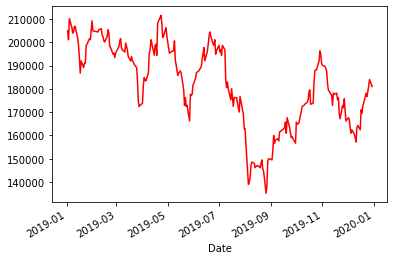

In [62]:
oir_1['Close'].plot(color='red', label='셀트리온')

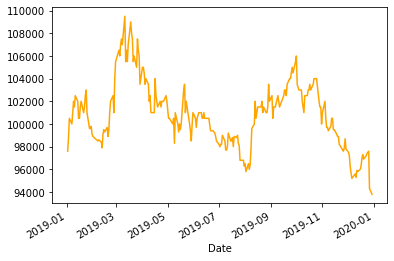

In [63]:
oir_2['Close'].plot(color='orange', label='KT&G')

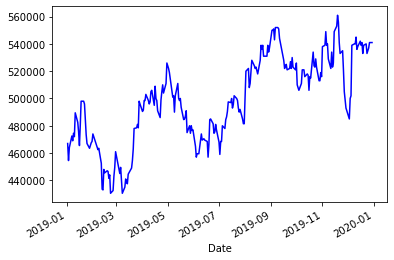

In [64]:
oir_3['Close'].plot(color='blue', label='엔씨소프트')

3년간 영업이익율이 증가한 기업 찾기

In [65]:
OIR_2 = []
for i in range(len(code_1)):
    code = code_1[i]
    oir1 = float(fin_data(code,1,"영업이익률",4,"a")[0])
    oir2 = float(fin_data(code,1,"영업이익률",4,"a")[1])
    oir3 = float(fin_data(code,1,"영업이익률",4,"a")[2])
    if (oir1<oir2) & (oir2<oir3):
        OIR_2.append(code_1[i])

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [66]:
OIR_2

['005930',
 '000660',
 '005490',
 '028260',
 '055550',
 '051900',
 '032830',
 '018260',
 '006400',
 '000810',
 '003550',
 '086790',
 '000030',
 '066570',
 '024110',
 '009150']

In [67]:
bool_oir_2 = rank_1["Code"].str.contains('005930|000660|005490|028260|055550|051900|032830|018260|006400|000810|003550|086790|000030|066570|024110|009150')
code_oir_2 = rank_1[bool_oir_2]
code_oir_2

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
8,005490,POSCO,2.066328e+13,10.0,175260.0,4.186762e+10
9,028260,삼성물산,1.972776e+13,11.0,246954.0,2.580417e+10
12,055550,신한지주,1.868346e+13,14.0,868545.0,3.441367e+10
15,051900,LG생활건강,1.688327e+13,17.0,26387.0,2.901240e+10
16,032830,삼성생명,1.606000e+13,18.0,221030.0,1.779167e+10
17,018260,삼성에스디에스,1.593983e+13,19.0,99070.0,2.062928e+10
19,006400,삼성SDI,1.447493e+13,21.0,345548.0,7.376963e+10
22,000810,삼성화재,1.253064e+13,24.0,49598.0,1.311979e+10


In [68]:
code_oir_2_name = code_oir_2[['Code','Name']].reset_index(drop=True)
code_oir_2_name

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,005490,POSCO
3,028260,삼성물산
4,055550,신한지주
5,051900,LG생활건강
6,032830,삼성생명
7,018260,삼성에스디에스
8,006400,삼성SDI
9,000810,삼성화재


In [69]:
oir2_1 = fdr.DataReader('005930', '2019-01-01' , '2019-12-31')
oir2_2 = fdr.DataReader('000660', '2019-01-01' , '2019-12-31')
oir2_3 = fdr.DataReader('005490', '2019-01-01' , '2019-12-31')
oir2_4 = fdr.DataReader('028260', '2019-01-01' , '2019-12-31')
oir2_5 = fdr.DataReader('105560', '2019-01-01' , '2019-12-31')
oir2_6 = fdr.DataReader('055550', '2019-01-01' , '2019-12-31')
oir2_7 = fdr.DataReader('051900', '2019-01-01' , '2019-12-31')
oir2_8 = fdr.DataReader('032830', '2019-01-01' , '2019-12-31')
oir2_9 = fdr.DataReader('018260', '2019-01-01' , '2019-12-31')
oir2_10 = fdr.DataReader('006400', '2019-01-01' , '2019-12-31')
oir2_11 = fdr.DataReader('000810', '2019-01-01' , '2019-12-31')
oir2_12 = fdr.DataReader('003550', '2019-01-01' , '2019-12-31')
oir2_13 = fdr.DataReader('086790', '2019-01-01' , '2019-12-31')
oir2_14 = fdr.DataReader('000030', '2019-01-01' , '2019-12-31')
oir2_15 = fdr.DataReader('066570', '2019-01-01' , '2019-12-31')
oir2_16 = fdr.DataReader('024110', '2019-01-01' , '2019-12-31')
oir2_17 = fdr.DataReader('009150', '2019-01-01' , '2019-12-31')

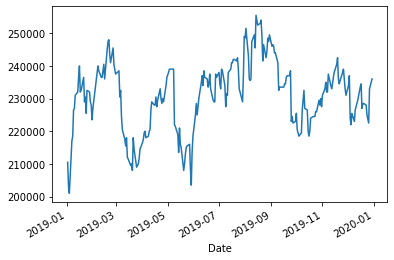

In [70]:
# oir2_1['Close'].plot()
# oir2_2['Close'].plot()
# oir2_3['Close'].plot()
# oir2_4['Close'].plot()
# oir2_5['Close'].plot()
# oir2_6['Close'].plot()
# oir2_7['Close'].plot()
# oir2_8['Close'].plot()
# oir2_9['Close'].plot()
oir2_10['Close'].plot()
# oir2_11['Close'].plot()
# oir2_12['Close'].plot()
# oir2_13['Close'].plot()
# oir2_14['Close'].plot()
# oir2_15['Close'].plot()
# oir2_16['Close'].plot()
# oir2_17['Close'].plot()

In [71]:
for i in range(len(OIR_2)):
    cnt = 0
    code = OIR_2[i]
    name = code_oir_2_name['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


삼성전자 ['14.5', '22.4', '24.2', '12.1']
SK하이닉스 ['19.1', '45.6', '51.5', '10.1']
POSCO ['5.4', '7.6', '8.5', '6.0']
삼성물산 ['0.5', '3.0', '3.5', '2.8']
신한지주 ['14.0', '16.0', '18.9', '16.8']
LG생활건강 ['14.5', '15.2', '15.4', '15.3']
삼성생명 ['3.2', '5.3', '8.0', '3.9']
삼성에스디에스 ['7.7', '7.9', '8.7', '9.2']
삼성SDI ['-17.8', '1.8', '7.8', '4.6']
삼성화재 ['4.9', '5.7', '6.5', '3.7']
LG ['13.7', '18.5', '23.5', '15.6']
하나금융지주 ['4.7', '6.9', '9.7', '8.4']
우리은행 ['5.1', '6.6', '6.7', '9.1']
LG전자 ['2.4', '4.0', '4.4', '3.9']
기업은행 ['10.0', '12.1', '15.4', '13.2']
삼성전기 ['0.4', '4.5', '14.4', '9.1']


영업이익률이 증가하였지만 10미만에서 증하는 기업들이 있으므로 최근 년도의 증가율은 10% 이상인 기업만 골라낸다 

In [72]:
OIR_3 = []
for i in range(len(OIR_2)):
    code = OIR_2[i]
    oir3 = float(fin_data(code,1,"영업이익률",4,"a")[2])
    if oir3 >= 10:
        OIR_3.append(OIR_2[i])

In [73]:
OIR_3

['005930', '000660', '055550', '051900', '003550', '024110', '009150']

In [74]:
bool_oir_3 = rank_1["Code"].str.contains('005930|000660|055550|051900|003550|024110|009150')
code_oir_3 = rank_1[bool_oir_3]
code_oir_3

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
12,055550,신한지주,1.868346e+13,14.0,868545.0,3.441367e+10
15,051900,LG생활건강,1.688327e+13,17.0,26387.0,2.901240e+10
23,003550,LG,1.175114e+13,25.0,135878.0,9.348778e+09
38,024110,기업은행,7.587713e+12,40.0,1546090.0,2.110101e+10
39,009150,삼성전기,7.469370e+12,41.0,1052757.0,1.068763e+11


In [75]:
code_oir_3_name = code_oir_3[['Code','Name']].reset_index(drop=True)
code_oir_3_name

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,055550,신한지주
3,051900,LG생활건강
4,003550,LG
5,024110,기업은행
6,009150,삼성전기


In [128]:
list1 = []
for i in range(len(OIR_3)):
    code = OIR_3[i]
    name = code_oir_3_name['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))
    list1.append(fin_data(code,1,"영업이익률",4,"a"))

삼성전자 ['14.5', '22.4', '24.2', '12.1']
SK하이닉스 ['19.1', '45.6', '51.5', '10.1']
신한지주 ['14.0', '16.0', '18.9', '16.8']
LG생활건강 ['14.5', '15.2', '15.4', '15.3']
LG ['13.7', '18.5', '23.5', '15.6']
기업은행 ['10.0', '12.1', '15.4', '13.2']
삼성전기 ['0.4', '4.5', '14.4', '9.1']


In [135]:
pip install openpyxl

  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8920 sha256=4bab59d236c5c059d54f2cff2699f960c8c0b3ff274cb2ad8648e32123821adc
  Stored in directory: c:\users\205\appdata\local\pip\cache\wheels\e2\bd\55\048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [136]:
list1.to_excel('test.xlsx') 

AttributeError: 'list' object has no attribute 'to_excel'

In [77]:
data = fdr.DataReader('005930', '2019-01-01' , '2019-12-31')
data.loc['2019-01-02']['Open'], data.loc['2019-12-30']['Close']

(39400.0, 55800.0)

In [78]:
#연간 수익률 계산
for i in range(len(OIR_3)):
    name = code_oir_3_name['Name'][i]
    code = OIR_3[i]
    data = fdr.DataReader(code, '2019-01-01' , '2019-12-31')
    #  수익률 (12월종가 - 1월시가)/1월 시가 * 100
    jan = data.loc['2019-01-02']['Open']
    dec = data.loc['2019-12-30']['Close']
    profit = (dec - jan) / jan * 100
    print(name , profit)

삼성전자 41.62436548223351
SK하이닉스 53.507340946166394
신한지주 7.434944237918216
LG생활건강 14.014466546112118
LG 6.340057636887608
기업은행 -15.412186379928317
삼성전기 19.617224880382775


전체 39개 종목 수익률 계산

In [79]:
# 삼성전자우, 우리은행 제외
rank_2 = rank_1.drop(26,0)
rank_2 = rank_2.reset_index(drop=True)
rank_2

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,4.411694e+13,2.0,1934295.0,1.174588e+11
2,068270,셀트리온,2.691034e+13,3.0,1045357.0,2.285731e+11
3,207940,삼성바이오로직스,2.474571e+13,5.0,148344.0,5.654277e+10
4,005380,현대차,2.435817e+13,6.0,565493.0,6.511241e+10
5,051910,LG화학,2.378962e+13,7.0,227694.0,7.783693e+10
6,017670,SK텔레콤,2.200321e+13,8.0,129645.0,3.516252e+10
7,015760,한국전력,2.185888e+13,9.0,1503315.0,5.117194e+10
8,005490,POSCO,2.066328e+13,10.0,175260.0,4.186762e+10
9,028260,삼성물산,1.972776e+13,11.0,246954.0,2.580417e+10


In [80]:
#연간 수익률 계산
Profit = []
for i in range(len(rank_2)):
    name = rank_2['Name'][i]
    code = rank_2['Code'][i]
    data = fdr.DataReader(code, '2019-01-01' , '2019-12-31')
    #  수익률 (12월종가 - 1월시가)/1월 시가 * 100
    jan = data.loc['2019-01-02']['Open']
    dec = data.loc['2019-12-30']['Close']
    profit = (dec - jan) / jan * 100
    if profit >= 10:
        Profit.append(code)
    print(name , profit)

삼성전자 41.62436548223351
SK하이닉스 53.507340946166394
셀트리온 -15.590169286014083
삼성바이오로직스 11.16816431322208
현대차 2.553191489361702
LG화학 -9.544159544159545
SK텔레콤 -11.02803738317757
한국전력 -16.138763197586727
POSCO -3.2719836400818
삼성물산 2.843601895734597
NAVER 54.132231404958674
KB금융 2.0342612419700217
신한지주 7.434944237918216
현대모비스 34.38320209973753
SK 0.38314176245210724
LG생활건강 14.014466546112118
삼성생명 -8.812729498164016
삼성에스디에스 -5.121951219512195
SK이노베이션 -16.666666666666664
삼성SDI 6.306306306306306
KT&G -6.666666666666667
기아차 32.436472346786246
삼성화재 -9.14179104477612
LG 6.340057636887608
아모레퍼시픽 -3.8461538461538463
하나금융지주 1.2345679012345678
S-Oil -2.055498458376156
LG전자 13.902053712480253
엔씨소프트 16.469321851453174
셀트리온헬스케어 -27.29268125385829
롯데케미칼 -19.27927927927928
넷마블 -18.590308370044053
현대중공업 -2.3166023166023164
카카오 48.309178743961354
고려아연 -0.5847953216374269
KT -9.090909090909092
LG유플러스 -19.54674220963173
기업은행 -15.412186379928317
삼성전기 19.617224880382775


In [81]:
# 수익률이 10% 이상인 기업들
Profit 

['005930',
 '000660',
 '207940',
 '035420',
 '012330',
 '051900',
 '000270',
 '066570',
 '036570',
 '035720',
 '009150']

In [82]:
bool_oir_4 = rank_1["Code"].str.contains('207940|035420|012330|000270|066570|036570|035720')
code_oir_4 = rank_1[bool_oir_4]

In [83]:
code_oir_4 = code_oir_4.reset_index(drop=True)
code_oir_4

,Code,Name,Marcap,Rank,Volume,Amount
0,207940,삼성바이오로직스,2.474571e+13,5.0,148344.0,5.654277e+10
1,035420,NAVER,1.944798e+13,12.0,356120.0,4.225138e+10
2,012330,현대모비스,1.800861e+13,15.0,215479.0,4.020471e+10
3,000270,기아차,1.329592e+13,23.0,478590.0,1.569839e+10
4,066570,LG전자,1.027708e+13,30.0,568844.0,3.602874e+10
5,036570,엔씨소프트,1.024552e+13,31.0,83710.0,3.901083e+10
6,035720,카카오,8.505553e+12,36.0,173462.0,1.784987e+10


기존의 결과값에 있던 삼성전자, SK하이닉스, LG생활건강, 삼성전기를 제외한 나머지 기업들의 영업이익률을 확인

In [84]:
for i in range(len(code_oir_4)):
    code = code_oir_4['Code'][i]
    name = code_oir_4['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


삼성바이오로직스 ['-10.3', '14.2', '10.4', '13.1']
NAVER ['27.4', '25.2', '16.9', '10.8']
현대모비스 ['7.6', '5.8', '5.8', '6.2']
기아차 ['4.7', '1.2', '2.1', '3.5']
LG전자 ['2.4', '4.0', '4.4', '3.9']
엔씨소프트 ['33.4', '33.3', '35.9', '28.2']
카카오 ['7.9', '8.4', '3.0', '6.7']


수익률이 좋은 기업들은 대부분 영업이익률이 좋거나 증가추세를 보이는 것을 알 수 있다

같은 방법으로 2020년 유망주를 선택해보기

In [85]:
rank_12

,Code,Name,Marcap,Rank,Volume,Amount
Date,,,,,,
2019-12-02,005930,삼성전자,3.008770e+14,1.0,18877252.0,9.443282e+11
2019-12-02,000660,SK하이닉스,5.860419e+13,2.0,1945991.0,1.574748e+11
2019-12-02,005935,삼성전자우,3.398522e+13,3.0,654720.0,2.702767e+10
2019-12-02,035420,NAVER,2.826550e+13,4.0,275601.0,4.756871e+10
2019-12-02,005380,현대차,2.596068e+13,5.0,862135.0,1.034822e+11
2019-12-02,207940,삼성바이오로직스,2.580435e+13,6.0,64001.0,2.496536e+10
2019-12-02,012330,현대모비스,2.349310e+13,7.0,242207.0,5.960705e+10
2019-12-02,068270,셀트리온,2.252329e+13,8.0,346391.0,6.085469e+10
2019-12-02,051910,LG화학,2.181303e+13,9.0,123351.0,3.813465e+10


In [109]:
rank_12 = rank_12.reset_index(drop=True)
rank_12 = rank_12.drop(2,0)
rank_12 = rank_12.drop(32,0)
# 삼성전자우 ,우리은행 금융지주 는 제외하기
rank_12 = rank_12.reset_index(drop=True)
rank_12

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,3.008770e+14,1.0,18877252.0,9.443282e+11
1,000660,SK하이닉스,5.860419e+13,2.0,1945991.0,1.574748e+11
2,035420,NAVER,2.826550e+13,4.0,275601.0,4.756871e+10
3,005380,현대차,2.596068e+13,5.0,862135.0,1.034822e+11
4,207940,삼성바이오로직스,2.580435e+13,6.0,64001.0,2.496536e+10
5,012330,현대모비스,2.349310e+13,7.0,242207.0,5.960705e+10
6,068270,셀트리온,2.252329e+13,8.0,346391.0,6.085469e+10
7,051910,LG화학,2.181303e+13,9.0,123351.0,3.813465e+10
8,055550,신한지주,2.067510e+13,10.0,602272.0,2.624820e+10
9,005490,POSCO,2.022735e+13,11.0,212885.0,4.947668e+10


In [110]:
code_12 = []
for i in range(len(rank_12)):
    code_12.append(rank_12['Code'][i])

In [111]:
code_12

['005930',
 '000660',
 '035420',
 '005380',
 '207940',
 '012330',
 '068270',
 '051910',
 '055550',
 '005490',
 '051900',
 '017670',
 '105560',
 '028260',
 '015760',
 '034730',
 '000270',
 '006400',
 '018260',
 '032830',
 '096770',
 '035720',
 '033780',
 '003550',
 '066570',
 '090430',
 '000810',
 '086790',
 '036570',
 '010950',
 '009540',
 '009150',
 '010130',
 '251270',
 '011170',
 '091990',
 '030200',
 '024110',
 '002790']

In [113]:
#3년동안 영업이익률이 10% 이상인 기업
OIR12 = []
for i in range(len(code_12)):
    cnt = 0
    code = code_12[i]
#     print(code)
    for j in range(1,4):
        if float(fin_data(code,1,"영업이익률",4,"a")[j]) >=  10 :
            cnt = cnt + 1
#             print(float(fin_data(code,1,"영업이익률",4,"a")[j]))

    if cnt == 3 : 
        OIR12.append(code_1[i])
    

In [114]:
OIR12

['005930',
 '000660',
 '068270',
 '005380',
 '017670',
 '005490',
 '035420',
 '000810',
 '003550',
 '066570',
 '251270',
 '032640']

In [116]:
bool_oir_12 = rank_12["Code"].str.contains('005930|000660|068270|005380|017670|005490|035420|000810|003550|066570|251270|032640')
code_oir_12 = rank_12[bool_oir_12]
code_oir_12

,Code,Name,Marcap,Rank,Volume,Amount
0,005930,삼성전자,3.008770e+14,1.0,18877252.0,9.443282e+11
1,000660,SK하이닉스,5.860419e+13,2.0,1945991.0,1.574748e+11
2,035420,NAVER,2.826550e+13,4.0,275601.0,4.756871e+10
3,005380,현대차,2.596068e+13,5.0,862135.0,1.034822e+11
6,068270,셀트리온,2.252329e+13,8.0,346391.0,6.085469e+10
9,005490,POSCO,2.022735e+13,11.0,212885.0,4.947668e+10
11,017670,SK텔레콤,1.954046e+13,13.0,300055.0,7.302760e+10
23,003550,LG,1.244137e+13,25.0,177957.0,1.283370e+10
24,066570,LG전자,1.150444e+13,26.0,237237.0,1.665868e+10
26,000810,삼성화재,1.110940e+13,28.0,87516.0,2.057760e+10


In [126]:
# 3년간 영업이익이 증가하는 기업
rise_12 = []
for i in range(len(code_12)):
    code = code_12[i]
    oir1 = float(fin_data(code,1,"영업이익률",4,"a")[1])
    oir2 = float(fin_data(code,1,"영업이익률",4,"a")[2])
    oir3 = float(fin_data(code,1,"영업이익률",4,"a")[3])
    if (oir1<oir2) & (oir2<oir3) :
        rise_12.append(code)

In [121]:
rise_12

['000270', '018260']

In [123]:
bool_oir_12 = rank_12["Code"].str.contains('000270|018260')
code_oir_12 = rank_12[bool_oir_12]
code_oir_12

,Code,Name,Marcap,Rank,Volume,Amount
16,000270,기아차,1.728875e+13,18.0,1012449.0,4.299374e+10
18,018260,삼성에스디에스,1.539818e+13,20.0,66023.0,1.305349e+10


In [125]:
fin_data('000270',1,"영업이익률",4,"a"), fin_data('018260',1,"영업이익률",4,"a"), 

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


(['4.7', '1.2', '2.1', '3.5'], ['7.7', '7.9', '8.7', '9.2'])

In [137]:
import csv

In [147]:
# path = 'list_1.csv'
# with open(path, 'r', encoding='utf-16') as f:
#     lines  = f.readlines()
df3 = pd.read_csv('list_1.csv',encoding='ANSI')

In [148]:
df3

,삼성전자,14.5,22.4,24.2
0,SK하이닉스,19.1,45.6,51.5
1,신한지주,14.0,16.0,18.9
2,LG생활건강,14.5,15.2,15.4
3,LG,13.7,18.5,23.5
4,기업은행,10.0,12.1,15.4
5,삼성전기,0.4,4.5,14.4
